In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Count unique train labels
train_label_counts = pd.Series(y_train).value_counts()
print("Train labels: ", train_label_counts.to_dict())

Train labels:  {1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421}


In [4]:
# Count unique test labels
test_label_counts = pd.Series(y_test).value_counts()
print("\nTest labels: ", test_label_counts.to_dict())


Test labels:  {1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892}


In [5]:
# Sample 25 MNIST digits from train dataset
indexes = np.random.choice(x_train.shape[0], 25, replace=False)
images = x_train[indexes]
labels = y_train[indexes]


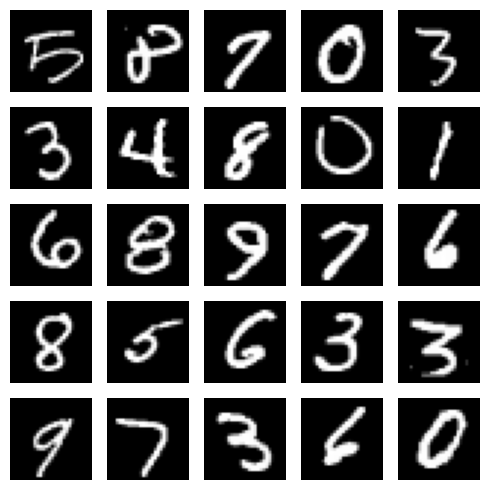

In [6]:
# Plot the 25 MNIST digits
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.savefig("mnist-samples.png")
plt.show()

In [7]:
# Prepare data for the model
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_labels)
y_test = to_categorical(y_test, num_classes=num_labels)


In [8]:
# Flatten and normalize image data
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# Model parameters
batch_size = 128
hidden_units = 256
dropout_rate = 0.45

# Build the model
model = Sequential([
    Dense(hidden_units, input_shape=(28*28,), activation='relu'),
    Dropout(dropout_rate),
    Dense(hidden_units, activation='relu'),
    Dropout(dropout_rate),
    Dense(num_labels, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=batch_size,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"\nTest accuracy: {accuracy * 100:.1f}%")

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7525 - loss: 0.7775 - val_accuracy: 0.9595 - val_loss: 0.1342
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9353 - loss: 0.2179 - val_accuracy: 0.9717 - val_loss: 0.0966
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9515 - loss: 0.1615 - val_accuracy: 0.9755 - val_loss: 0.0831
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9593 - loss: 0.1348 - val_accuracy: 0.9773 - val_loss: 0.0798
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9650 - loss: 0.1166 - val_accuracy: 0.9783 - val_loss: 0.0721
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9669 - loss: 0.1066 - val_accuracy: 0.9790 - val_loss: 0.0723
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9700 - loss: 0.0960 - val_accuracy: 0.9808 - val_loss: 0.0649
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9713 - loss: 0.0935 - val_accu